In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
class TokenGameState:
    def __init__(self, tokens, maximizingPlayer):
        self._tokens = tokens
        self._maximizingPlayer = maximizingPlayer

    def getTokens(self):
        return self._tokens
    def getMaximizingPlayer(self):
        return self._maximizingPlayer

In [3]:
class TokenGameStateRandomEvaluator:
    def evaluate(self,state):
        return random.choice([-2, -1, 1, 2])

In [4]:
class TokenGameStateEvaluator:
    def __init__(self,k):
        self._k = k

    def getK(self):
        return self._k

    def isWinning(self, tokens):
        if (tokens-1)%(self.getK()+1)==0:
            return False
        else:
            return True
        


    def evaluate(self,state):
        if self.isWinning(state.getTokens()):
            if state.getMaximizingPlayer():
                return 1
            else:
                return -1
        else:
            if state.getMaximizingPlayer():
                return -1
            else:
                return 1

In [5]:
class TokenGameHandler:

    def __init__(self,k, evaluator):
        self._k = k
        self._evaluator = evaluator

    def getK(self):
        return self._k
    
    def getEvaluator(self):
        return self._evaluator

    # def isWinning(self, tokens):
    #     if (tokens-1)%(self.getK()+1)==0:
    #         return False
    #     else:
    #         return True

    def getOffsprings(self, state, maximizingPlayer):
        offsprings = []
        for i in range(1,self.getK()+1):
            if state.getTokens()-i < 1:
                continue
            offsprings.append(TokenGameState(state.getTokens()-i, not maximizingPlayer))
        return offsprings

    def evaluate(self, state):
        return self.getEvaluator().evaluate(state)
        # if self.isWinning(state.getTokens()):
        #     if state.getMaximizingPlayer():
        #         return 1
        #     else:
        #         return -1
        # else:
        #     if state.getMaximizingPlayer():
        #         return -1
        #     else:
        #         return 1

    def isEndState(self,state):
        return state.getTokens() ==1



In [6]:
# def isWinning(tokens,k):
#     if (tokens-1)%(k+1)==0:
#         return False
#     else:
#         return True

In [7]:
# def evaluateState(tokens, k, maximizingPlayer):
#     if isWinning(tokens,k):
#         if maximizingPlayer:
#             return 1
#         else:
#             return -1
#     else:
#         if maximizingPlayer:
#             return -1
#         else:
#             return 1

In [8]:
# def minimaxAlfaBeta2(state, depth, alpha, beta, maximizingPlayer, gameHandler):
#     if depth == 0 or gameHandler.isEndState(state):
#         return gameHandler.evaluate(state)
#     if maximizingPlayer:
#         maxValue = -np.inf
#         for offspring in gameHandler.getOffsprings(state, maximizingPlayer):
#             value = minimaxAlfaBeta2(offspring,depth-1,alpha,beta,False,gameHandler)
#             maxValue = max(maxValue,value)
#             alpha = max(alpha,value)
#             # alpha = max(alpha, minimaxAlfaBeta2(offspring, depth-1, alpha, beta, False, gameHandler))
#             # if alpha >= beta:
#             #     return beta
#             if beta <= alpha:
#                 break
#         return maxValue
#     else:
#         minValue = np.inf
#         for offspring in gameHandler.getOffsprings(state, maximizingPlayer):
#             value = minimaxAlfaBeta2(offspring,depth-1,alpha,beta,True,gameHandler)
#             minValue = min(minValue,value)
#             beta = min(beta,value)
#             if beta <=alpha:
#                 break
#         return minValue
#             # beta = min(beta, minimaxAlfaBeta2(offspring, depth-1, alpha, beta, True, gameHandler))
#             # if alpha >= beta:
#             #     return alpha
#         # return beta

In [9]:
def minimaxAlfaBeta2(state, depth, alpha, beta, maximizingPlayer, gameHandler):
    if depth == 0 or gameHandler.isEndState(state):
        return gameHandler.evaluate(state)
    if maximizingPlayer:
        for offspring in gameHandler.getOffsprings(state, maximizingPlayer):
            alpha = max(alpha, minimaxAlfaBeta2(offspring, depth-1, alpha, beta, False, gameHandler))
            if alpha >= beta:
                return beta
        return alpha
    else:
        for offspring in gameHandler.getOffsprings(state, maximizingPlayer):
            beta = min(beta, minimaxAlfaBeta2(offspring, depth-1, alpha, beta, True, gameHandler))
            if alpha >= beta:
                return alpha
        return beta

In [10]:
def launchMinimax(tokens,k,depth,randomEvaluator=False):
    
    state = TokenGameState(tokens, True)
    if randomEvaluator:
        tokenGameStateEvaluator = TokenGameStateRandomEvaluator()
    else:    
        tokenGameStateEvaluator = TokenGameStateEvaluator(k)
    tokenGameHandler = TokenGameHandler(k,tokenGameStateEvaluator)
    return minimaxAlfaBeta2(state,depth,-10,10,True, tokenGameHandler)

In [25]:
def randomLaunchMinimax(minTokens,maxTokens,minK,maxK,depth,randomEvaluator=False):
    tokens = random.randint(minTokens,maxTokens)
    k = random.randint(minK,maxK)
    return launchMinimax(tokens,k,depth,randomEvaluator)

In [23]:
tokens = 10
k = 2
depth = 2
print(launchMinimax(tokens,k,depth))

-1


In [21]:
tokens = random.randint(10,20)
k = random.randint(2,5)
depth = 2
print(launchMinimax(tokens,k,depth))
print(f'tokens: {tokens}, k: {k}')

1
tokens: 20, k: 5


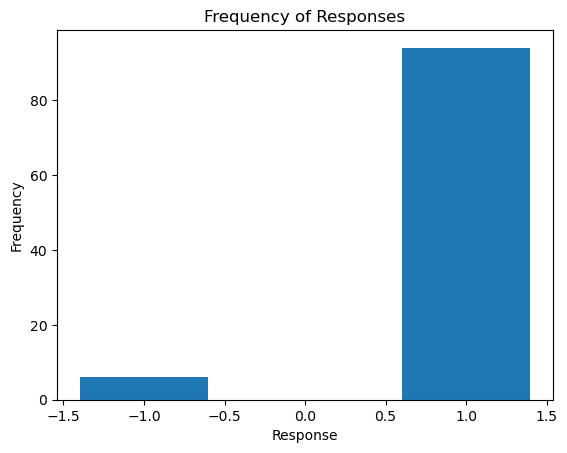

In [33]:

def run_launchMinimax(minTokens,maxTokens,minK,maxK,depth):
    results = []
    for _ in range(100):
        result = randomLaunchMinimax(minTokens,maxTokens,minK,maxK,depth)
        results.append(result)
    
    unique_values, frequencies = np.unique(results, return_counts=True)
    
    plt.bar(unique_values, frequencies)
    plt.xlabel('Response')
    plt.ylabel('Frequency')
    plt.title('Frequency of Responses')
    plt.show()



minTokens = 10
maxTokens = 20
minK = 9
maxK = 10
depth = 2
run_launchMinimax(minTokens,maxTokens,minK,maxK,depth)
